<a href="https://colab.research.google.com/github/ratelist/test_colab/blob/main/retention_testcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Работа с данными

предположим в июле провели специальную акцию, направленную на улучшение ретеншена. Новым юзерам слали письмо с купоном. Сработала ли акция?

https://drive.google.com/file/d/14-_zC8RuCrwHDqkI25J2KACFJAUvjxpp/view?usp=sharing

сделать можно на питоне в юпитер или экселе или в гугл шите, даже можете в sql сделать, как удобнее.

обратно нужно дать файл с формулами или кодом и описание того, как получился результат поэтапно.

In [ ]:
!gdown 1tKN1FXFRJ87nkOsEsOvfzkhT-l7bHOcH -O /usr/lib/python3.10/lib-dynload/
# MENU: Runtime > Restart runtime
import os
os.kill(os.getpid(), 9)

In [1]:
import sqlite3
sqlite3.sqlite_version

'3.42.0'

In [55]:
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
!gdown 14-_zC8RuCrwHDqkI25J2KACFJAUvjxpp

Downloading...
From: https://drive.google.com/uc?id=14-_zC8RuCrwHDqkI25J2KACFJAUvjxpp
To: /content/analyst_test_transactions_db.csv
100% 3.07M/3.07M [00:00<00:00, 138MB/s]


In [4]:
# Подключение к БД SQLite
con = sqlite3.connect('db')

In [5]:
# Создание курсора для выполнения запросов
cur = con.cursor()

In [6]:
# Функция выполнения запросов с возвратом DataFrame
def select(sql):
  return pd.read_sql(sql,con)

In [7]:
# Чтение данных из CSV-файла
df = pd.read_csv('/content/analyst_test_transactions_db.csv')

In [8]:
df.head()

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984


In [9]:
len(df)

76857

In [10]:
# Получение min и max значений даты регистрации
df['reg_date'].agg(['min','max'])

min    1900-01-01
max    2015-11-20
Name: reg_date, dtype: object

In [11]:
df.dtypes

user_id               int64
order_id            float64
reg_date             object
transaction_date     object
revenue               int64
dtype: object

In [12]:
# Преобразование колонок дат в формат datetime
df['reg_date'] = pd.to_datetime(df['reg_date'],format='%Y-%m-%d')

In [13]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'],format='%Y-%m-%d')

In [14]:
df.dtypes

user_id                      int64
order_id                   float64
reg_date            datetime64[ns]
transaction_date    datetime64[ns]
revenue                      int64
dtype: object

In [15]:
df['reg_date'].agg(['min','max'])

min   1900-01-01
max   2015-11-20
Name: reg_date, dtype: datetime64[ns]

In [58]:
df['reg_month'] = df['reg_date'].values.astype('datetime64[M]')

In [59]:
df['reg_month']

0       2013-12-01
1       2013-11-01
2       2015-07-01
3       2013-07-01
4       2013-05-01
           ...    
76852   2015-01-01
76853   2015-01-01
76854   2012-09-01
76855   2015-02-01
76856   2015-03-01
Name: reg_month, Length: 76857, dtype: datetime64[ns]

In [60]:
df.groupby(['reg_month'])['user_id'].agg(['count','nunique'])

,count,nunique
reg_month,,
1900-01-01,53,53
2012-02-01,9,9
2012-03-01,362,361
2012-04-01,370,370
2012-05-01,301,301
2012-06-01,445,443
2012-07-01,370,369
2012-08-01,271,269
2012-09-01,356,355


In [173]:
# Создаём столбец transaction_month
df['transaction_month'] = df['transaction_date'].values.astype('datetime64[M]')

In [65]:
df.dtypes

user_id                       int64
order_id                    float64
reg_date             datetime64[ns]
transaction_date     datetime64[ns]
revenue                       int64
reg_month            datetime64[ns]
transaction_month    datetime64[ns]
dtype: object

In [66]:
df.groupby(['transaction_month'])['user_id'].agg(['count','nunique'])

,count,nunique
transaction_month,,
2015-01-01,4058,3951
2015-02-01,4932,4777
2015-03-01,5824,5599
2015-04-01,6102,5862
2015-05-01,6339,6063
2015-06-01,6829,6480
2015-07-01,7520,7166
2015-08-01,8598,8110
2015-09-01,8468,7964


In [67]:
df['user_id'].nunique()

48214

In [68]:
len(df.groupby(['reg_month'])['user_id'].agg(['count','nunique']))

47

<Axes: >

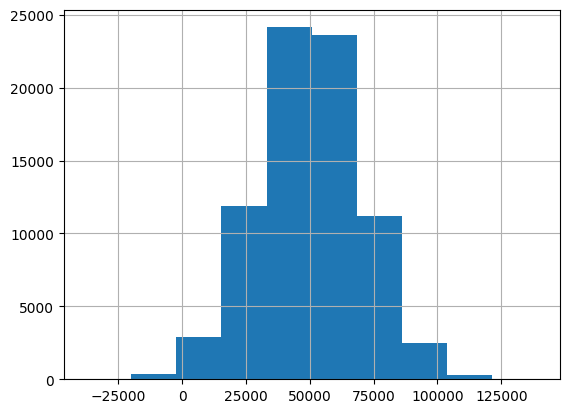

In [69]:
df['user_id'].hist()

In [70]:
df[df['user_id']<0]

,user_id,order_id,reg_date,transaction_date,revenue,reg_month,transaction_month
117,-7670,84002.0,2015-02-09,2015-02-22,808,2015-02-01,2015-02-01
144,-4741,141322.0,2015-06-15,2015-10-07,728,2015-06-01,2015-10-01
339,-16994,22456.0,2015-06-13,2015-07-25,878,2015-06-01,2015-07-01
380,-6927,157109.0,2015-02-07,2015-06-12,727,2015-02-01,2015-06-01
503,-5446,74254.0,2014-08-08,2015-03-05,711,2014-08-01,2015-03-01
...,...,...,...,...,...,...,...
76104,-10718,85345.0,2014-09-12,2015-09-25,783,2014-09-01,2015-09-01
76133,-2931,137163.0,2014-11-30,2015-05-13,952,2014-11-01,2015-05-01
76302,-2156,78342.0,2014-09-15,2015-03-11,834,2014-09-01,2015-03-01
76585,-5397,30581.0,2012-03-11,2015-11-20,1054,2012-03-01,2015-11-01


<Axes: >

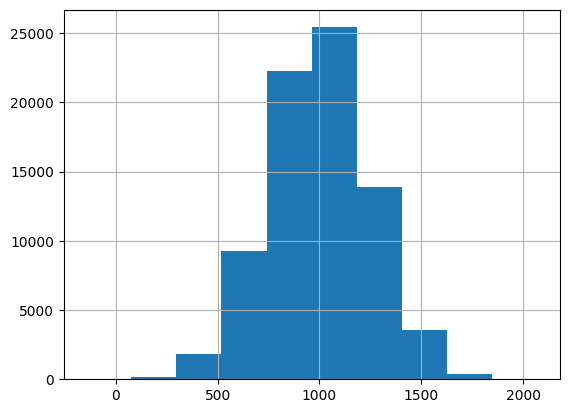

In [71]:
df['revenue'].hist()

<Axes: >

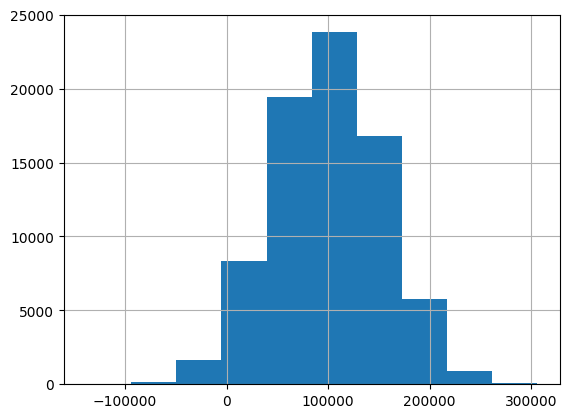

In [72]:
df['order_id'].hist()

In [73]:
# Построение вспомогательных таблиц для дальнейшего анализа
user = df.groupby('user_id')['reg_month'].min().reset_index()

In [74]:
user

,user_id,reg_month
0,-37599,2015-01-01
1,-32239,2015-11-01
2,-29822,2015-07-01
3,-29531,2014-09-01
4,-25337,2015-04-01
...,...,...
48209,128964,2015-10-01
48210,130617,2015-02-01
48211,131071,2012-04-01
48212,132484,2015-06-01


In [75]:
len(df.groupby(['transaction_month'])['user_id'].agg(['count','nunique']))

11

In [76]:
min_date = df['transaction_month'].min()
max_date = df['transaction_month'].max()

In [77]:
month = pd.DataFrame(pd.date_range(min_date,max_date,freq='MS'))

In [78]:
month.columns = ['month']

In [79]:
user['key'] = 1
month['key'] = 1

In [80]:
# Объединения таблиц
template = user.merge(month,on='key')[['user_id','reg_month','month']]

In [81]:
len(template)

530354

In [82]:
# Фильтрация полученной таблицы по условию
template = template[template['month'] >= template['reg_month']]

In [83]:
template

,user_id,reg_month,month
0,-37599,2015-01-01,2015-01-01
1,-37599,2015-01-01,2015-02-01
2,-37599,2015-01-01,2015-03-01
3,-37599,2015-01-01,2015-04-01
4,-37599,2015-01-01,2015-05-01
...,...,...,...
530349,138987,2014-10-01,2015-07-01
530350,138987,2014-10-01,2015-08-01
530351,138987,2014-10-01,2015-09-01
530352,138987,2014-10-01,2015-10-01


In [84]:
trans_month = df.groupby(['user_id','transaction_month'])['revenue'].sum().reset_index()

In [85]:
trans_month.columns = ['user_id','month', 'revenue']

In [86]:
trans_month

,user_id,month,revenue
0,-37599,2015-03-01,1182
1,-32239,2015-11-01,727
2,-29822,2015-09-01,908
3,-29531,2015-06-01,1462
4,-25337,2015-07-01,899
...,...,...,...
73027,128964,2015-10-01,1049
73028,130617,2015-06-01,1295
73029,131071,2015-10-01,856
73030,132484,2015-08-01,747


In [87]:
report = template.merge(trans_month,on=['user_id','month'],how='left')

In [88]:
report

,user_id,reg_month,month,revenue
0,-37599,2015-01-01,2015-01-01,NaN
1,-37599,2015-01-01,2015-02-01,NaN
2,-37599,2015-01-01,2015-03-01,1182.0
3,-37599,2015-01-01,2015-04-01,NaN
4,-37599,2015-01-01,2015-05-01,NaN
...,...,...,...,...
467620,138987,2014-10-01,2015-07-01,NaN
467621,138987,2014-10-01,2015-08-01,NaN
467622,138987,2014-10-01,2015-09-01,NaN
467623,138987,2014-10-01,2015-10-01,NaN


In [89]:
report['active'] = (report['revenue'] > 0) *1

In [90]:
report

,user_id,reg_month,month,revenue,active
0,-37599,2015-01-01,2015-01-01,NaN,0
1,-37599,2015-01-01,2015-02-01,NaN,0
2,-37599,2015-01-01,2015-03-01,1182.0,1
3,-37599,2015-01-01,2015-04-01,NaN,0
4,-37599,2015-01-01,2015-05-01,NaN,0
...,...,...,...,...,...
467620,138987,2014-10-01,2015-07-01,NaN,0
467621,138987,2014-10-01,2015-08-01,NaN,0
467622,138987,2014-10-01,2015-09-01,NaN,0
467623,138987,2014-10-01,2015-10-01,NaN,0


In [91]:
report.pivot_table(index='reg_month', columns='month',values='active',aggfunc='count')

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0
2012-02-01,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
2012-03-01,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0
2012-04-01,369.0,369.0,369.0,369.0,369.0,369.0,369.0,369.0,369.0,369.0,369.0
2012-05-01,298.0,298.0,298.0,298.0,298.0,298.0,298.0,298.0,298.0,298.0,298.0
2012-06-01,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0
2012-07-01,359.0,359.0,359.0,359.0,359.0,359.0,359.0,359.0,359.0,359.0,359.0
2012-08-01,264.0,264.0,264.0,264.0,264.0,264.0,264.0,264.0,264.0,264.0,264.0
2012-09-01,345.0,345.0,345.0,345.0,345.0,345.0,345.0,345.0,345.0,345.0,345.0


In [92]:
report.pivot_table(index='reg_month', columns='month',values='active',aggfunc='sum')

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,8.0,9.0,18.0,8.0,9.0,13.0,6.0,5.0,5.0,9.0,5.0
2012-02-01,1.0,2.0,1.0,0.0,4.0,2.0,2.0,2.0,2.0,0.0,2.0
2012-03-01,53.0,57.0,45.0,55.0,53.0,66.0,61.0,70.0,64.0,106.0,58.0
2012-04-01,54.0,51.0,85.0,62.0,62.0,63.0,63.0,61.0,65.0,89.0,66.0
2012-05-01,29.0,47.0,50.0,56.0,56.0,54.0,53.0,74.0,52.0,63.0,54.0
2012-06-01,51.0,62.0,64.0,90.0,75.0,70.0,71.0,69.0,86.0,106.0,77.0
2012-07-01,49.0,51.0,55.0,63.0,60.0,55.0,65.0,69.0,53.0,94.0,67.0
2012-08-01,21.0,40.0,49.0,53.0,40.0,40.0,51.0,57.0,54.0,66.0,50.0
2012-09-01,54.0,45.0,53.0,66.0,57.0,59.0,50.0,60.0,57.0,67.0,50.0


In [93]:
retention = report.pivot_table(index='reg_month', columns='month',values='active',aggfunc='mean')

In [94]:
retention

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,0.150943,0.169811,0.339623,0.150943,0.169811,0.245283,0.113208,0.094340,0.094340,0.169811,0.094340
2012-02-01,0.111111,0.222222,0.111111,0.000000,0.444444,0.222222,0.222222,0.222222,0.222222,0.000000,0.222222
2012-03-01,0.146814,0.157895,0.124654,0.152355,0.146814,0.182825,0.168975,0.193906,0.177285,0.293629,0.160665
2012-04-01,0.146341,0.138211,0.230352,0.168022,0.168022,0.170732,0.170732,0.165312,0.176152,0.241192,0.178862
2012-05-01,0.097315,0.157718,0.167785,0.187919,0.187919,0.181208,0.177852,0.248322,0.174497,0.211409,0.181208
2012-06-01,0.116972,0.142202,0.146789,0.206422,0.172018,0.160550,0.162844,0.158257,0.197248,0.243119,0.176606
2012-07-01,0.136490,0.142061,0.153203,0.175487,0.167131,0.153203,0.181058,0.192201,0.147632,0.261838,0.186630
2012-08-01,0.079545,0.151515,0.185606,0.200758,0.151515,0.151515,0.193182,0.215909,0.204545,0.250000,0.189394
2012-09-01,0.156522,0.130435,0.153623,0.191304,0.165217,0.171014,0.144928,0.173913,0.165217,0.194203,0.144928


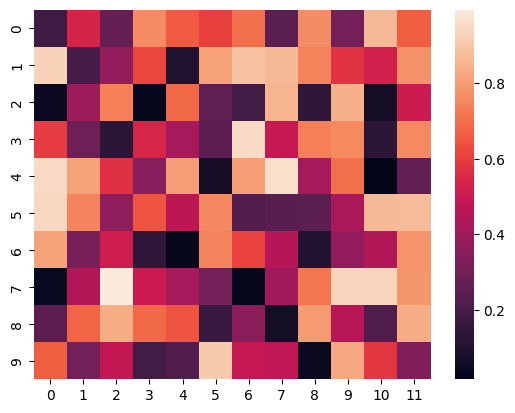

In [95]:
import numpy as np
import seaborn as sns
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [97]:
sns.set(font_scale=2,style="whitegrid",rc={'figure.figsize':(12,6)} )

<Axes: xlabel='month', ylabel='reg_month'>

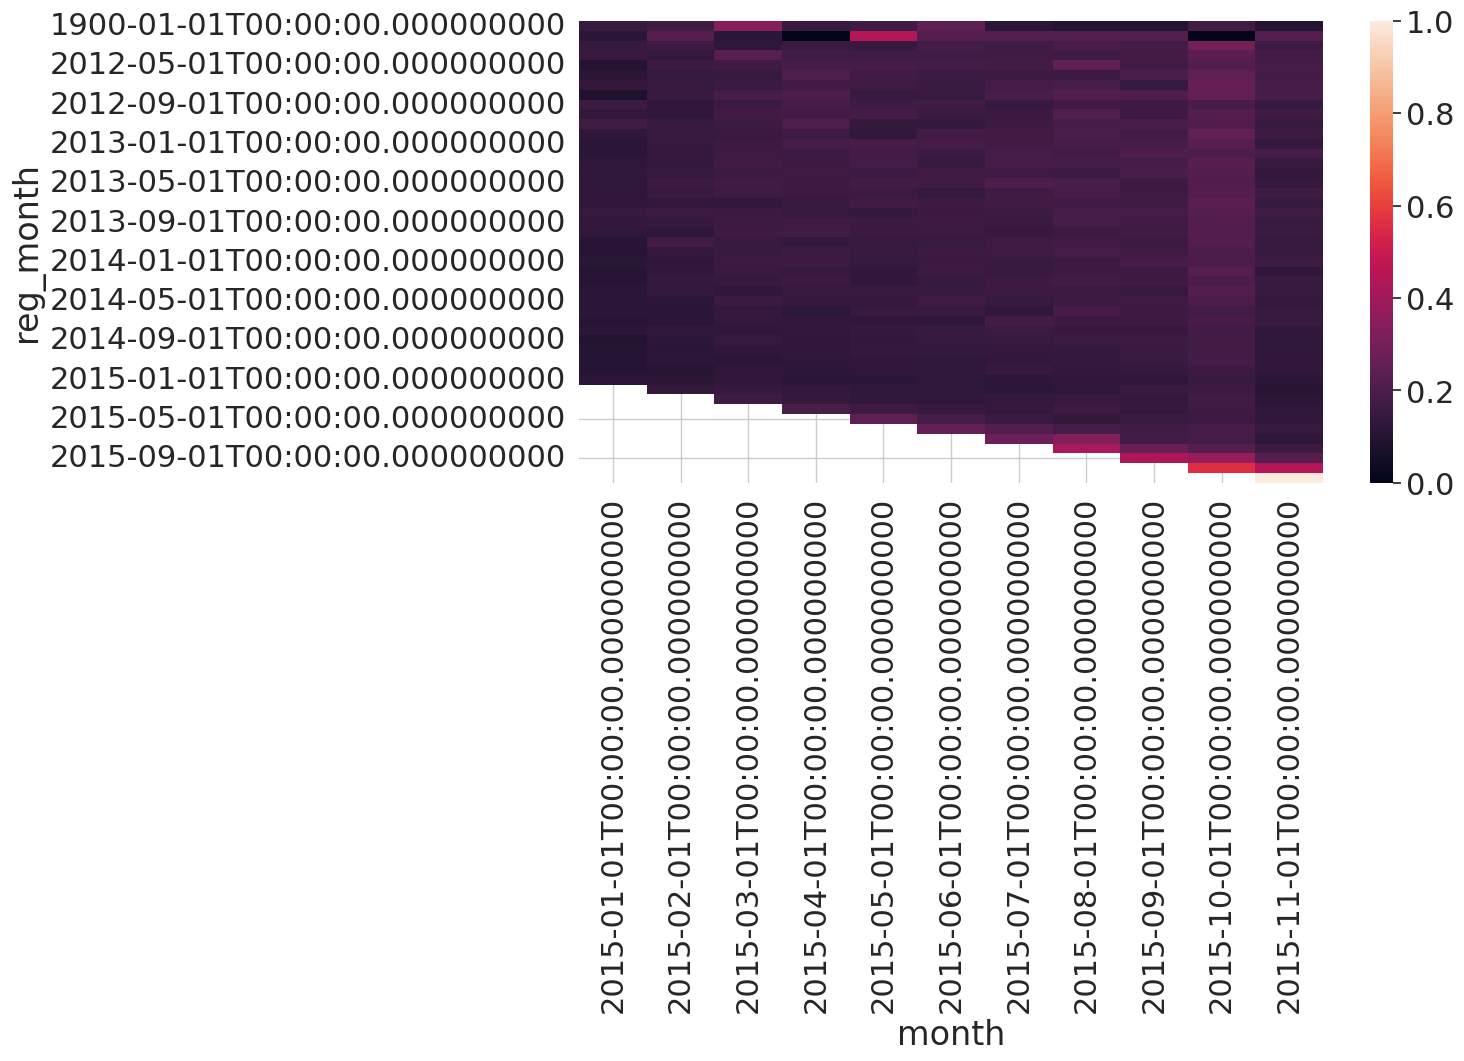

In [98]:
sns.heatmap(retention)

In [108]:
report['lifetime'] = ((report['month'] - report['reg_month']) / np.timedelta64(1, 'M')).round().astype(int)

In [106]:
report[report['user_id'] == 53288]

,user_id,reg_month,month,revenue,active,lifetime
257684,53288,2013-02-01,2015-01-01,NaN,0,22.965564
257685,53288,2013-02-01,2015-02-01,NaN,0,23.984065
257686,53288,2013-02-01,2015-03-01,NaN,0,24.904002
257687,53288,2013-02-01,2015-04-01,773.0,1,25.922504
257688,53288,2013-02-01,2015-05-01,NaN,0,26.908150
257689,53288,2013-02-01,2015-06-01,NaN,0,27.926651
257690,53288,2013-02-01,2015-07-01,NaN,0,28.912298
257691,53288,2013-02-01,2015-08-01,NaN,0,29.930799
257692,53288,2013-02-01,2015-09-01,NaN,0,30.949301
257693,53288,2013-02-01,2015-10-01,NaN,0,31.934947


In [113]:
report['reg_month_str'] = report['reg_month'].dt.strftime('%Y-%m')

In [109]:
retention =  report[report['reg_month'] >= '2015-01-01'].pivot_table(index='reg_month', columns='lifetime',values='active',aggfunc='mean')

In [172]:
retention

lifetime,0,1,2,3,4,5,6,7,8,9,10
reg_month,,,,,,,,,,,
2015-01-01,0.116928,0.116056,0.129581,0.116492,0.115183,0.124782,0.118237,0.131326,0.126091,0.148778,0.114311
2015-02-01,0.132856,0.141543,0.135922,0.121615,0.122126,0.119571,0.123659,0.149208,0.163005,0.105263,NaN
2015-03-01,0.164114,0.138403,0.129650,0.127462,0.138403,0.145514,0.138950,0.170678,0.117068,NaN,NaN
2015-04-01,0.193627,0.158088,0.144608,0.136029,0.161152,0.137255,0.167892,0.127451,NaN,NaN,NaN
2015-05-01,0.246457,0.184252,0.154331,0.136220,0.152756,0.159055,0.132283,NaN,NaN,NaN,NaN
2015-06-01,0.257924,0.216283,0.180236,0.168428,0.189559,0.141703,NaN,NaN,NaN,NaN,NaN
2015-07-01,0.283110,0.331367,0.179088,0.181769,0.124397,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,0.423358,0.268613,0.222628,0.157664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,0.429314,0.381497,0.221414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
retention['reg_month_str'] = retention['reg_month'].dt.str

<Axes: xlabel='lifetime', ylabel='reg_month'>

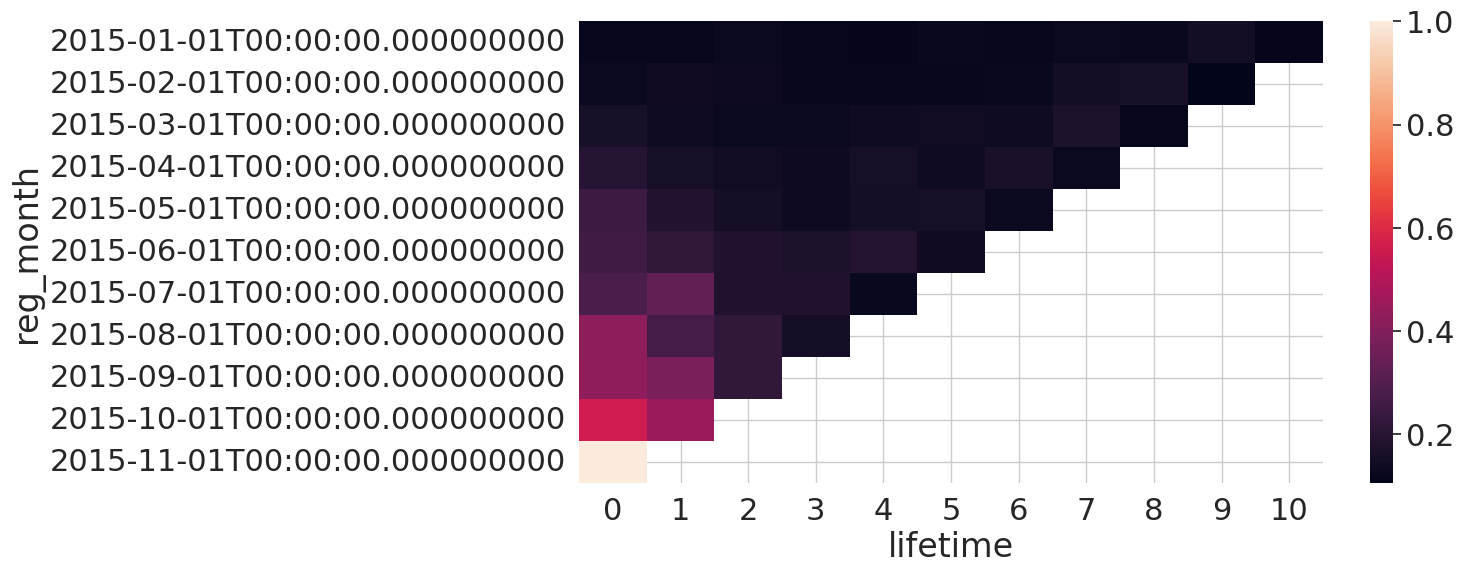

In [111]:
sns.heatmap(retention)

Основные наблюдения:

В июле 2015 была рекламная акция, на что указывает резкий рост коэффициентов удержания для когорт этого месяца.
Удержание абонентов падает в первые 1-3 месяца, что естественно.

# SQL

In [114]:
df = pd.read_csv('/content/analyst_test_transactions_db.csv')

In [116]:
df['reg_date'] = pd.to_datetime(df['reg_date'],format='%Y-%m-%d')
df['transaction_date'] = pd.to_datetime(df['transaction_date'],format='%Y-%m-%d')

In [117]:
df.dtypes

user_id                      int64
order_id                   float64
reg_date            datetime64[ns]
transaction_date    datetime64[ns]
revenue                      int64
dtype: object

In [118]:
df.to_sql('trans', con, index=False, if_exists='replace')

76857

In [119]:
sql = ''' select * from trans t'''

In [120]:
select(sql)

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22 00:00:00,2015-07-16 00:00:00,1088
1,40047,81824.0,2013-11-24 00:00:00,2015-01-19 00:00:00,1027
2,48153,144851.0,2015-07-03 00:00:00,2015-10-29 00:00:00,601
3,54591,116111.0,2013-07-12 00:00:00,2015-04-30 00:00:00,881
4,39789,134943.0,2013-05-25 00:00:00,2015-07-21 00:00:00,984
...,...,...,...,...,...
76852,36921,163682.0,2015-01-15 00:00:00,2015-03-28 00:00:00,1095
76853,31360,145146.0,2015-01-04 00:00:00,2015-08-09 00:00:00,547
76854,56195,8929.0,2012-09-18 00:00:00,2015-11-12 00:00:00,850
76855,46362,78673.0,2015-02-20 00:00:00,2015-07-21 00:00:00,356


In [121]:
sql = ''' select t.user_id, date(min(reg_date), 'start of month') as reg_month  from trans t
group by t.user_id

'''

In [122]:
select(sql)

,user_id,reg_month
0,-37599,2015-01-01
1,-32239,2015-11-01
2,-29822,2015-07-01
3,-29531,2014-09-01
4,-25337,2015-04-01
...,...,...
48209,128964,2015-10-01
48210,130617,2015-02-01
48211,131071,2012-04-01
48212,132484,2015-06-01


In [128]:
min = '''select date(min(t.transaction_date), 'start of month') from trans t'''

In [129]:
select(min)

,"date(min(t.transaction_date), 'start of month')"
0,2015-01-01


In [130]:
max = '''select date(max(t.transaction_date), 'start of month') from trans t'''

In [131]:
select(max)

,"date(max(t.transaction_date), 'start of month')"
0,2015-11-01


In [132]:
sql = f'''WITH RECURSIVE dates(date) AS (
  VALUES(({min}))
  UNION ALL
  SELECT date(date, '+1 month')
  FROM dates
  WHERE date < ({max})
)
SELECT date FROM dates;'''

In [133]:
select(sql)

,date
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
5,2015-06-01
6,2015-07-01
7,2015-08-01
8,2015-09-01
9,2015-10-01


In [167]:
sql = f'''with

users as (
  select t.user_id, date(min(reg_date), 'start of month') as reg_month  from trans t
group by t.user_id
),

dates as (
  WITH RECURSIVE dates(date) AS (
  VALUES(({min}))
  UNION ALL
  SELECT date(date, '+1 month')
  FROM dates
  WHERE date < ({max})
)
SELECT date FROM dates
),

template as (

select t.user_id, t.reg_month, d.date as month from users t
join dates d on d.date >= t.reg_month),

trans_month as (

  select t.user_id,
  date(t.transaction_date, 'start of month') as month,
  sum(t.revenue) as revenue_sum,
  count(1) as transaction_cnt

   from trans t
   group by t.user_id,
  date(t.transaction_date, 'start of month')

  ),

  report as (
select t.*, tm.revenue_sum, tm.transaction_cnt,
case when tm.revenue_sum > 0 then 1 else 0 end as active,

round((julianday(t.month) - julianday(t.reg_month)) / 30) as lifetime

 from template t
left join trans_month tm on t.user_id = tm.user_id and t.month = tm.month )


select t.reg_month, t.lifetime, avg(t.active) as retention from report t
where t.reg_month >= '2015-01-01'
group by t.reg_month, t.lifetime

'''

In [168]:
t = select(sql)

In [169]:
t

,reg_month,lifetime,retention
0,2015-01-01,0.0,0.116928
1,2015-01-01,1.0,0.116056
2,2015-01-01,2.0,0.129581
3,2015-01-01,3.0,0.116492
4,2015-01-01,4.0,0.115183
...,...,...,...
61,2015-09-01,1.0,0.381497
62,2015-09-01,2.0,0.221414
63,2015-10-01,0.0,0.561974
64,2015-10-01,1.0,0.448857


In [170]:
t.pivot_table(index='reg_month', columns='lifetime', values='retention', aggfunc='max')

lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
reg_month,,,,,,,,,,,
2015-01-01,0.116928,0.116056,0.129581,0.116492,0.115183,0.124782,0.118237,0.131326,0.126091,0.148778,0.114311
2015-02-01,0.132856,0.141543,0.135922,0.121615,0.122126,0.119571,0.123659,0.149208,0.163005,0.105263,NaN
2015-03-01,0.164114,0.138403,0.129650,0.127462,0.138403,0.145514,0.138950,0.170678,0.117068,NaN,NaN
2015-04-01,0.193627,0.158088,0.144608,0.136029,0.161152,0.137255,0.167892,0.127451,NaN,NaN,NaN
2015-05-01,0.246457,0.184252,0.154331,0.136220,0.152756,0.159055,0.132283,NaN,NaN,NaN,NaN
2015-06-01,0.257924,0.216283,0.180236,0.168428,0.189559,0.141703,NaN,NaN,NaN,NaN,NaN
2015-07-01,0.283110,0.331367,0.179088,0.181769,0.124397,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,0.423358,0.268613,0.222628,0.157664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,0.429314,0.381497,0.221414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
retention

lifetime,0,1,2,3,4,5,6,7,8,9,10
reg_month,,,,,,,,,,,
2015-01-01,0.116928,0.116056,0.129581,0.116492,0.115183,0.124782,0.118237,0.131326,0.126091,0.148778,0.114311
2015-02-01,0.132856,0.141543,0.135922,0.121615,0.122126,0.119571,0.123659,0.149208,0.163005,0.105263,NaN
2015-03-01,0.164114,0.138403,0.129650,0.127462,0.138403,0.145514,0.138950,0.170678,0.117068,NaN,NaN
2015-04-01,0.193627,0.158088,0.144608,0.136029,0.161152,0.137255,0.167892,0.127451,NaN,NaN,NaN
2015-05-01,0.246457,0.184252,0.154331,0.136220,0.152756,0.159055,0.132283,NaN,NaN,NaN,NaN
2015-06-01,0.257924,0.216283,0.180236,0.168428,0.189559,0.141703,NaN,NaN,NaN,NaN,NaN
2015-07-01,0.283110,0.331367,0.179088,0.181769,0.124397,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,0.423358,0.268613,0.222628,0.157664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,0.429314,0.381497,0.221414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
